# Assignment 5 - Breast Cancer Detection
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

## Instructions
1. Test both entropy and the gini coefficient. Which performs better and why?
2. What are the best hyperparameter settings for both?
3. Visualize both models and see which feature is selected for each criterion. Are they same for both? Why or why not?
4. Determine the AUC for the best model you can achieve. What are the precision and recal values and which might be the one you want to maximize?
5. What are the implications of using this type of machine learning algorithm for breast cancer analysis?

In [40]:
# Load necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

from imblearn.over_sampling import SMOTE 

from IPython.display import Image
from subprocess import check_call

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import warnings

warnings.filterwarnings("ignore") # To suppress warning

%matplotlib inline

pd.options.display.max_rows = None

# Read and perform data cleaning

In [32]:
# Load data
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(filename, header=None)
# Headers from https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names
feature_names = ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
             'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']
# Assign column's names
df.columns = np.append(feature_names, ['Class']) # Class (Target Attribute): 2 for benign, 4 for malignant
# Convert the Missing attribute's value (denoted by "?") to numeric data including nans
df.loc[:, 'Bare Nuclei'] = df.apply(lambda x: pd.to_numeric(x, errors='coerce'), axis=0)
# Drop rows with missing fields (16 instances)
df = df.dropna()

In [3]:
# View first five rows of the data frame
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [4]:
# Print DataFrame's size
print(df.shape)
# Print DataFrame's data types
# Note: we can see that all columns were numeric columns now (after did the missing value replacement)
print(df.dtypes)

(683, 11)
Sample code number               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object


In [33]:
# Separate the independent variables (AKA Features) from the dependent labels (AKA Target)
targetOutcome = pd.DataFrame(df,columns=['Class'])
allFeatures = pd.DataFrame(df,columns=df.columns.difference(['Class']))

# Handling class imbalance using SMOTE method
sm = SMOTE(random_state=0)
allInputs_resample, targetOutcome_resample = sm.fit_sample(allFeatures, targetOutcome.values.ravel())

# Split the Training (90%) and Testing Data (10%)
X, XX, Y, YY = train_test_split(allInputs_resample, targetOutcome_resample, test_size = 0.1, random_state = 0)

# Tuning the Depth of a Tree
Finding the optimal value formax_depth is one way way to tune the model. Below are the plots for both **Entropy** and **Gini** methods in order to find the best hyperparameter settings for each models. The model that id too complex (has too high depth of tree) is prone to <font color=red>**overfitting**</font> so it's best to fine tune this number.

## 1. Entropy 

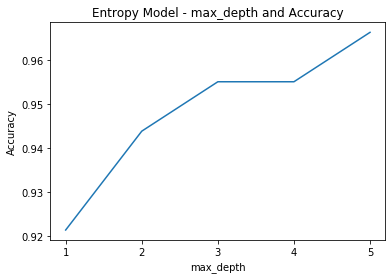

In [41]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))# List to store the average RMSE for each value of max_depth:
accuracy_entropy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth = depth, random_state = 0)
    clf.fit(X, Y)    
    score = clf.score(XX, YY)
    accuracy_entropy.append(score)
    
# Plot max_depth and accuracy for Entropy model
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
ax.set_title('Entropy Model - max_depth and Accuracy')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(max_depth_range, accuracy_entropy)
plt.show()

## 2. Gini Coefficient

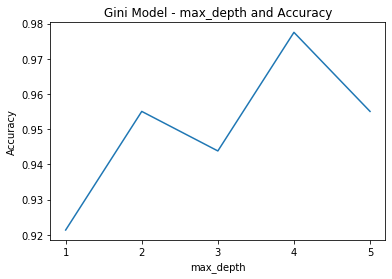

In [43]:
# List of values to try for max_depth:
accuracy_gini = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X, Y)    
    score = clf.score(XX, YY)
    accuracy_gini.append(score)
    
# Plot max_depth and accuracy for Entropy model
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
ax.set_title('Gini Model - max_depth and Accuracy')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(max_depth_range, accuracy_gini)
plt.show()

# Create Decision Trees Model

## 1. Entropy 

In [44]:
# Based on the tuning the depth of a tree for Entropy, the best max_depth is 3
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3).fit(X, Y) 
y_entropy_predict = model_entropy.predict(XX)

## 2. Gini Coefficient

In [45]:
# Use information gain (default)
# Based on the tuning the depth of a tree for Gini, the best max_depth is 4
model_gini = DecisionTreeClassifier(max_depth = 4).fit(X, Y)
y_gini_predict = model_gini.predict(XX)

# Visualize Decision Trees Model

## 1. Entropy 

In [46]:
# Confusion Metrix
pd.DataFrame(
    metrics.confusion_matrix(YY, y_entropy_predict),
    columns=['Predicted Benign', 'Predicted Malignant'],
    index=['True Benign', 'True Malignant']
)

,Predicted Benign,Predicted Malignant
True Benign,44,1
True Malignant,3,41


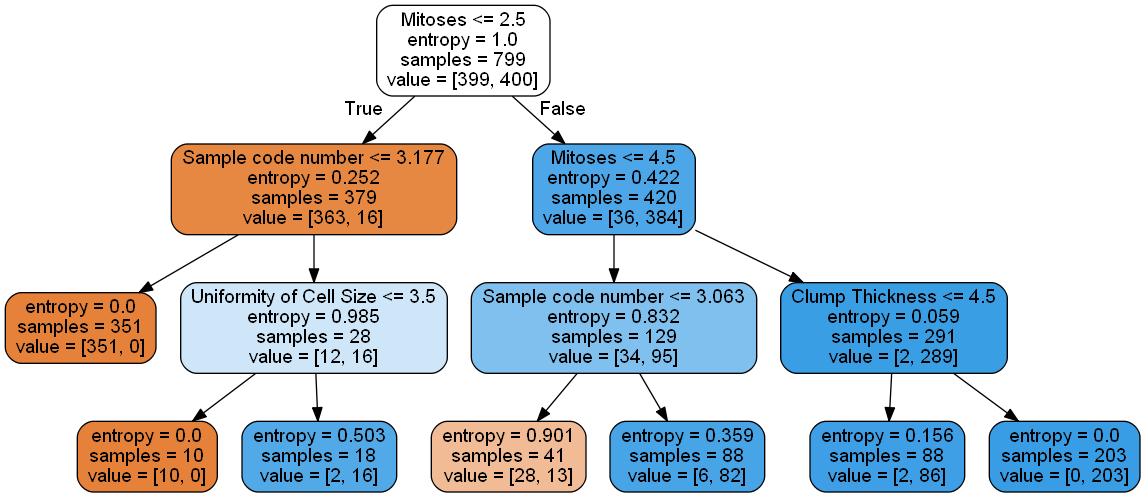

In [47]:
entropy_dotfile = open("entropy_dtree.dot", 'w')
tree.export_graphviz(model_entropy, out_file = entropy_dotfile, filled=True, rounded=True, feature_names = feature_names)
entropy_dotfile.close()

# Convert the dot file to a png
check_call(['dot','-Tpng','entropy_dtree.dot','-o','entropy_dtree.png'])

# show the png
Image(filename='entropy_dtree.png', width=750, height=750)

## 2. Gini Coefficient

In [48]:
# Confusion Metrix
pd.DataFrame(
    metrics.confusion_matrix(YY, y_gini_predict),
    columns=['Predicted Benign', 'Predicted Malignant'],
    index=['True Benign', 'True Malignant']
)

,Predicted Benign,Predicted Malignant
True Benign,44,1
True Malignant,1,43


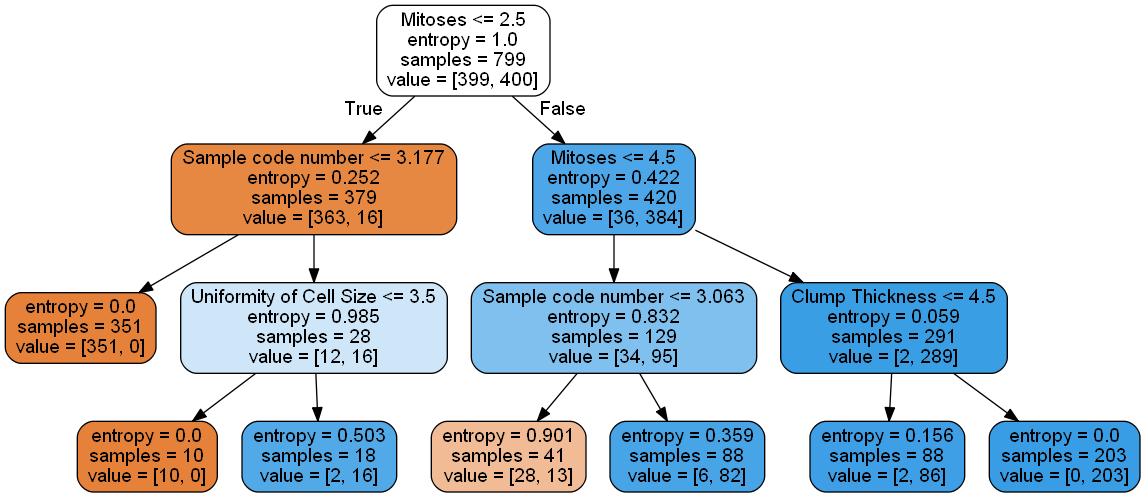

In [49]:
gini_dotfile = open("gini_dtree.dot", 'w')
tree.export_graphviz(model_entropy, out_file = gini_dotfile, filled=True, rounded=True, feature_names = feature_names)
gini_dotfile.close()

# Convert the dot file to a png
check_call(['dot','-Tpng','gini_dtree.dot','-o','gini_dtree.png'])

# show the png
Image(filename='gini_dtree.png', width=750, height=750)

***
**Note:**
***

# AUC, Precision and Recall

## 1. Entropy 

Entropy Accuracy is : 95.50561797752809%
Entropy Precision is : 97.61904761904762%
Entropy Recall is : 93.18181818181817%


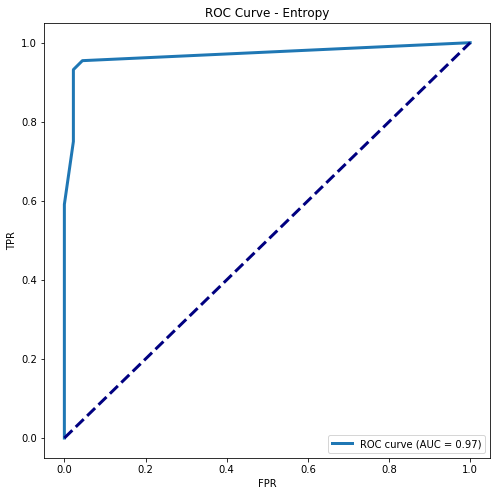

In [50]:
entropy_bothProbabilities = model_entropy.predict_proba(XX)
entropy_probabilities = entropy_bothProbabilities[:,1]

# pos_label- the label of the positive class (2 for benign (negative), 4 for malignant(positive))
print("Entropy Accuracy is : {}%".format(metrics.accuracy_score(YY, y_entropy_predict)*100))
print("Entropy Precision is : {}%".format(metrics.precision_score(YY, y_entropy_predict, pos_label=4)*100))
print("Entropy Recall is : {}%".format(metrics.recall_score(YY, y_entropy_predict, pos_label=4)*100))

# False Positive Rate, True Posisive Rate, probability thresholds
fpr, tpr, th = metrics.roc_curve(YY, entropy_probabilities, pos_label=4) 
AUC = metrics.auc(fpr, tpr)

# Plot ROC Curve
plt.rcParams["figure.figsize"] = [8, 8] # Square
plt.figure()
plt.title('ROC Curve - Entropy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show()

## 2. Gini Coefficient

Gini Accuracy is : 97.75280898876404%
Gini Precision is : 97.72727272727273%
Gini Recall is : 97.72727272727273%


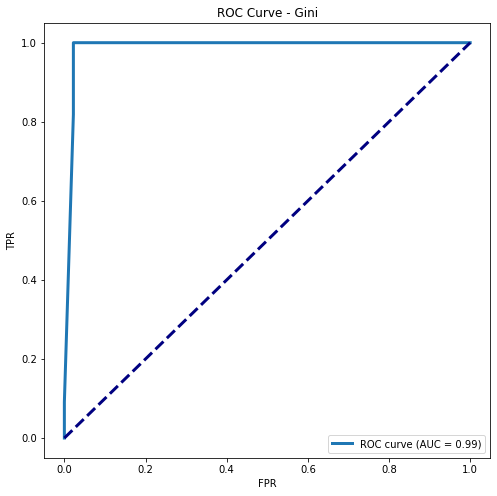

In [51]:
gini_bothProbabilities = model_gini.predict_proba(XX)
gini_probabilities = gini_bothProbabilities[:,1]

# pos_label- the label of the positive class (2 for benign (negative), 4 for malignant(positive))
print("Gini Accuracy is : {}%".format(metrics.accuracy_score(YY, y_gini_predict)*100))
print("Gini Precision is : {}%".format(metrics.precision_score(YY, y_gini_predict, pos_label=4)*100))
print("Gini Recall is : {}%".format(metrics.recall_score(YY, y_gini_predict, pos_label=4)*100))

# False Positive Rate, True Posisive Rate, probability thresholds
fpr, tpr, th = metrics.roc_curve(YY, gini_probabilities, pos_label=4) 
AUC = metrics.auc(fpr, tpr)

# Plot ROC Curve
plt.rcParams["figure.figsize"] = [8, 8] # Square
plt.figure()
plt.title('ROC Curve - Gini')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show()

# Implications of using Decision Trees algorithm for breast cancer analysis

This type of machine learning algorithm use for **Cancer Prediction** and **Prognosis** for early detection. Decision tree and SVM is a most important technique in the medical field. Most data mining methods which are commonly used in this domain are considered as classification category and applied prediction techniques assign patients to either a” benign” group that is noncancerous or a” malignant” group that is cancerous.

***
**Summary:**
1. **Gini Coefficient** perform slightly better than **Entropy** method. The reason is that I handle the **imbalance** of the data set using **SMOTE** and  **Gain Ratio (Entropy)** generally prefers the unbalanced split of data where one of the child node has more number of entries compared to the others.
2. **Best hyperparameter:** 
    - max_depth for **Entropy** is 3
    - max_depth for **Gini** is 4
3. The selected features for both decision trees models are the same which are:
    - **Mitoses**
    - **Sample code number**
    - **Uniformity of Cell Size**
    - **Clump Thickness**
    - <font color=blue>**This two decision trees models are the same which indicate that the data set is balance.**</font>
4. **AUC:**
    - **Entropy** is **0.97**
    - **Gini** is **0.99**
5. **Precision:**
    - **Entropy** is : **97.61904761904762 %**
    - **Gini** is **97.72727272727273 %**
6. **Recall:**
    - **Entropy** is : **93.18181818181817 %**
    - **Gini** is **97.72727272727273 %**
    
**Note** I prefer to maximize **Recall** over **Precision** since recall refers to the percentage of total relevant results correctly classified by the algorithm. We want to <font color=green>**classify the breast cancer correctly as much as possible (which are informed by Recall)**</font> rather than how many times they were actually <font color=red>**positive (malignant)**</font> which are informed by **Precision**.
***